In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 선형 회귀

## feature가 1개인 경우

In [2]:
# X, y
import numpy as np

X = 4*np.random.rand(200, 1) # 4*(0~1 사이 균등분포 난수 200x1) -> 범위 0~4
y = 6 + 2 * X + np.random.randn(200, 1) # 0~1 사이 표준정규분포 난수

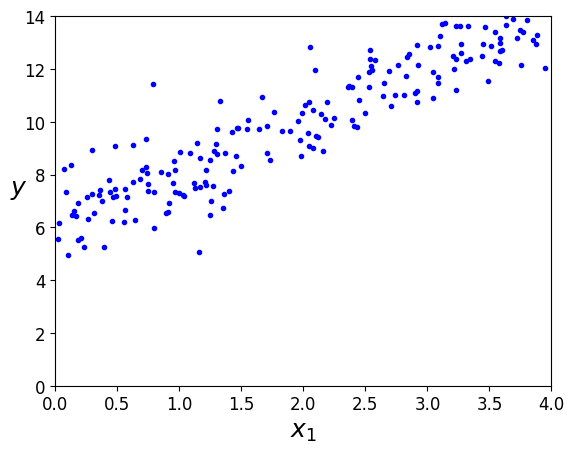

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 4, 0, 14])
plt.show()

In [4]:
# print(X)

### 정규방정식 
**정규방정식**으로 theta 찾기 

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [5]:
X_b = np.c_[np.ones((200, 1)), X] # 행렬곱을 위해 모든 sample(X) 에 열방향으로 1을 붙임
# print(X_b)

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[6.10520115],
       [1.98048223]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [7]:
# 예측값을 출력하기 위한 2차원 배열 만들기
X_new = np.array([[0], [4]])
## [[0],
##  [4]]

# 모든 sample(X)에 열방향으로 1을 붙임
X_new_b = np.c_[np.ones((2, 1)), X_new]
## [[1, 0],
##  [1, 4]]

# 정규방정식으로 구한 theta를 이용해서 y값 예측 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 6.10520115],
       [14.02713008]])

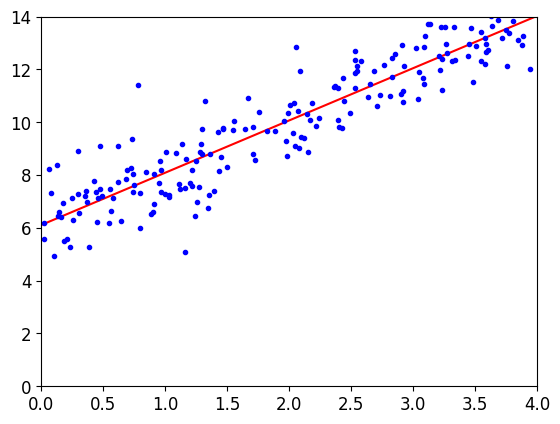

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 4, 0, 14])
plt.show()

### sklearn 
**sklearn** 이용해서 theta 찾기 

In [9]:
from sklearn.linear_model import LinearRegression

mod1 = LinearRegression() # mod1이라는 linear regression model 선언
mod1.fit(X, y) # X와 y를 이용해 학습

mod1.intercept_, mod1.coef_ # 학습한 절편과 param. 출력

(array([6.10520115]), array([[1.98048223]]))

In [10]:
mod1.predict(X_new)

array([[ 6.10520115],
       [14.02713008]])

### 경사하강법


#### 1. 배치 경사 하강법

전체 sample을 이용하여 경사 하강법을 수행 <br>
미분값인 경사도를 보고 theta가 점점 줄어드는 방향으로 -eta를 곱해서 이동<br>
최적의 theta 구하는 방식

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000 # 반복해서 학습할 횟수
m = 200 # sample 수

In [12]:
theta = np.random.randn(2,1) # theta 초기화
## [[random 절편],
##  [random 기울기]]
print(theta)

[[ 0.85765962]
 [-0.15993853]]


In [13]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 식 4-6
    theta = theta - eta * gradients # gradients에 eta를 곱하는 이유는 너무 급하게 내려가지 않고 조금씩 내려가기 위함

In [14]:
theta # 정규방정식으로 계산한 결과와 거의 유사 

array([[6.10520115],
       [1.98048223]])

In [15]:
X_new_b.dot(theta) 

array([[ 6.10520115],
       [14.02713008]])

In [16]:
theta_path_bgd = []

# gradient descent 함수 선언
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        # 초기 10번 반복한 그래프
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 4, 0, 14])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<ipython-input-16-1acf6c95372b>:15: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


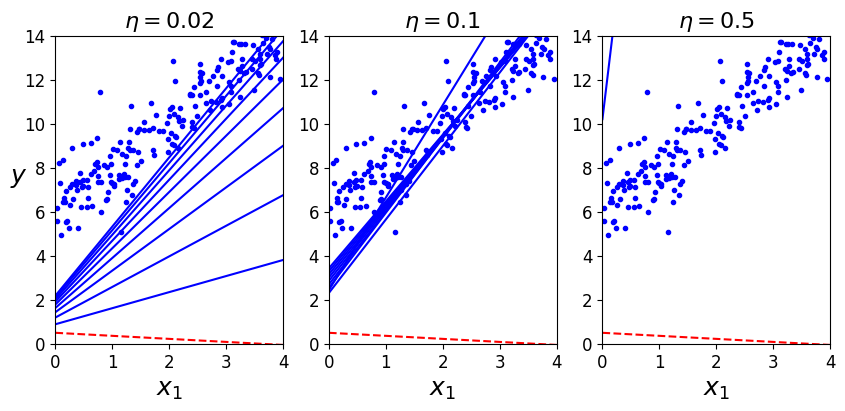

In [17]:
# eta를 다르게 하여 배치 경사하강법을 진행하는 경우
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# >> eta가 너무 작으면 더 많이 학습을 해야함
# >> eta = 0.1이 적정
# >> eta가가 너무 크면 최적점을 쉽게 벗어남남

#### 2. 확률적 경사 하강법<br>

model param.을 랜덤 초기화하는건 배치 경사 하강법과 동일 <br>
일부 데이터만 사용하여 경사하강법 진행 <br>
한 epoch에 대해 train data를 섞고 -> train set에서 sample 1개 꺼내서 경사하강법 <br>
gradient에 eta 곱해가며 param. 수정 -> 반복 -> train set 모두 사용시 epoch 재실행 

In [18]:
theta_path_sgd = [] # theta값 변화 확인 위한 list
m = len(X_b) 
np.random.seed(42)

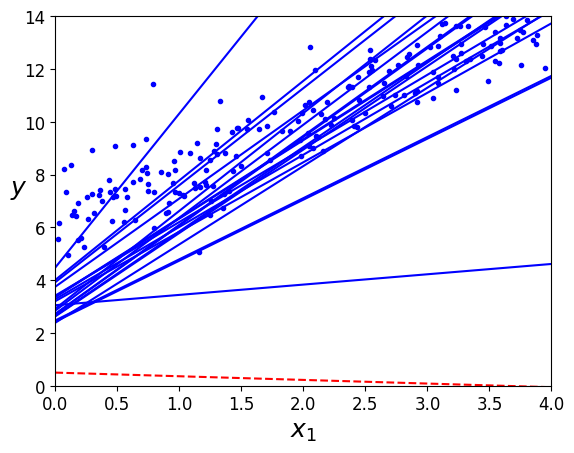

In [19]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

# 한 epoch는 전체 샘플을 모두 사용해야 함 -> m번 반복
for epoch in range(n_epochs):
    for i in range(m):
        # 과정 그리기
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)  

        # 이 예제는 샘플의 중복을 허용하지만 사이킷 런의 경우 중복을 허용하지 않도록 구현되어있음 
        random_index = np.random.randint(m) # 0~m까지의 숫자 중 random하게 index 추출
        xi = X_b[random_index:random_index+1] # 추출 index에 해당하는 x값 추출
        yi = y[random_index:random_index+1] # 추출 index에 해당하는 y값 추출
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # xi, yi에 대해 경사하강법 (2/m이 아닌 샘플 1개에 대해서 수행하므로 m이 빠져 있음)
        eta = learning_schedule(epoch * m + i)  # 학습할 수록 eta값을 줄여간다(최적 값에 조심스럽게 근사하기 위해서)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 4, 0, 14])                                                         
plt.show()               

In [20]:
theta

array([[6.0995298 ],
       [1.98147115]])

In [21]:
# sklearn 이용한 확률적 경사 하강법
from sklearn.linear_model import SGDRegressor

# max_iter = epoch, tol=손실 함수가 별 진전이 없으면 최적이라고 생각하고 알고리즘을 멈춰라
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# 사이킷 런의 y는 1차원 함수를 기대하지만 우리가 가진 y는 2차원 배열이기 때문에 ravel()을 사용
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([6.14131624]), array([2.12762783]))

#### 3. 미니배치 경사 하강법


배치 경사하강법 + 확률적 경사하강법 <br>
(샘플 전체 몽땅 사용) + (샘플 한개 씩 사용) => 적당히 몇개씩 사용

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    # 중복을 허용하지 않는 샘플링
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        # 미니 배치 개수씩 꺼내서 사용
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[6.22898815],
       [2.33283364]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [26]:
theta_path_bgd

array([[[2.43880078],
        [4.20831017]],

       [[2.30945476],
        [3.34104386]],

       [[2.5417878 ],
        [3.41412908]],

       ...,

       [[6.10520115],
        [1.98048223]],

       [[6.10520115],
        [1.98048223]],

       [[6.10520115],
        [1.98048223]]])

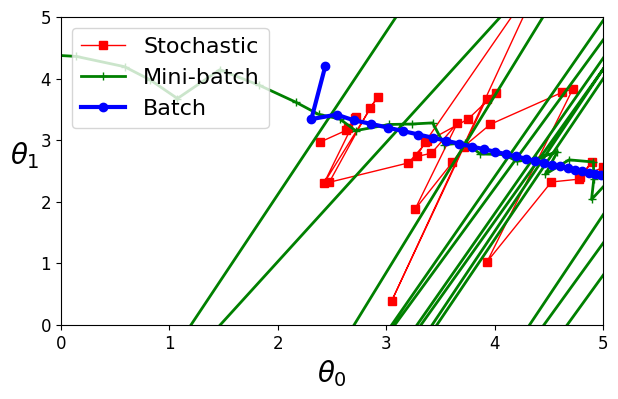

In [27]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([0, 5, 0, 5])
plt.show()
# >> 컴퓨터의 자원이 허락한다면 배치 경사하강법을 쓰는 게 좋지만 데이터 수가 많으면 불가능하기 때문에 미니 배치를 많이 사용

## feature가 2개인 경우

In [28]:
# 데이터 생성 
m = 200
X1 = 6 * np.random.rand(m, 1) - 3
X2 = 4 * np.random.rand(m, 1) - 1

y = 3 * X1 + X2 + 2 + np.random.randn(m, 1)

In [29]:
X_t = np.c_[X1, X2]

In [30]:
mod2 = LinearRegression()
mod2.fit(X_t, y)
mod2.intercept_, mod2.coef_

(array([2.154016]), array([[2.94917509, 0.96852673]]))

In [31]:
# 추정값
pred_2 = mod2.predict(X_t)
pred_2

array([[ 0.85108516],
       [ 5.98465915],
       [ 3.98025827],
       [-2.01081183],
       [ 7.71344036],
       [-2.36997538],
       [11.04022064],
       [ 8.82116595],
       [-0.38013399],
       [ 8.26791436],
       [-0.19989578],
       [-4.85677146],
       [ 9.99246152],
       [ 5.29118831],
       [ 1.38101945],
       [ 2.02428184],
       [ 0.73305292],
       [11.64891156],
       [-2.26383605],
       [ 1.16789546],
       [ 3.17494653],
       [ 3.19401111],
       [ 1.77474803],
       [-1.08471353],
       [-5.0036708 ],
       [-1.80338744],
       [11.31688252],
       [-5.35128269],
       [ 6.45025782],
       [ 8.02577702],
       [ 8.83636758],
       [10.88935712],
       [ 0.14055071],
       [-3.1903138 ],
       [ 0.64632022],
       [-0.2995364 ],
       [ 6.49924041],
       [ 6.01607557],
       [ 8.4041412 ],
       [-4.38086624],
       [10.48460524],
       [-0.20456321],
       [ 3.00890077],
       [ 2.01957457],
       [ 7.08076479],
       [ 0

# 다항 회귀
여러개의 특성이 존재하는 경우 

In [32]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [33]:
# dataset 만들기
m = 200

# 0~2 -> -1~1 (200x1)
X = 2 * np.random.rand(m, 1) - 1

# y = 2 x^2 + x + 4
y = 2 * X**2 + 3 * X + 4 + np.random.randn(m, 1)

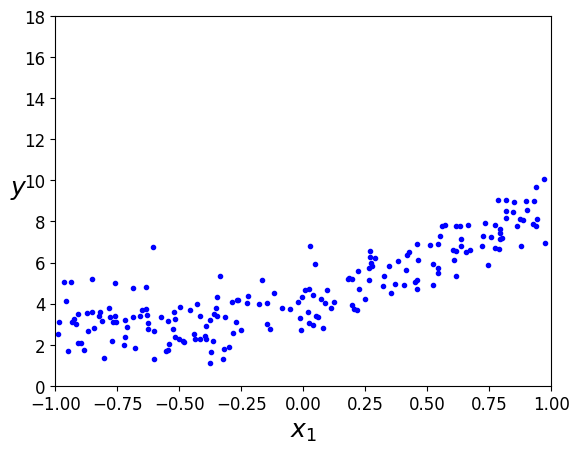

In [34]:
# (X, y) 그리기
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1, 0, 18])
plt.show()

In [35]:
from sklearn.preprocessing import PolynomialFeatures # 기존의 특성을 사용하여 가지고 있는 특성을 늘려주는 역할

poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree=2, 차수가 가장 높은 특성이 2까지 -> [x, x^2]
## cf. degree = 3 (a,b,c) -> 1, a, b, c, a^2, b^2, c^2, a^3, b^3, c^3, ac, bc, ca, a^2b, ...
X_poly = poly_features.fit_transform(X)

In [36]:
X_poly[0] # [random값, (random값)^2]

array([-0.25091976,  0.06296073])

In [37]:
mod2 = LinearRegression()
mod2.fit(X_poly, y)

mod2.intercept_, mod2.coef_

(array([3.98659698]), array([[2.96408159, 2.22950723]]))

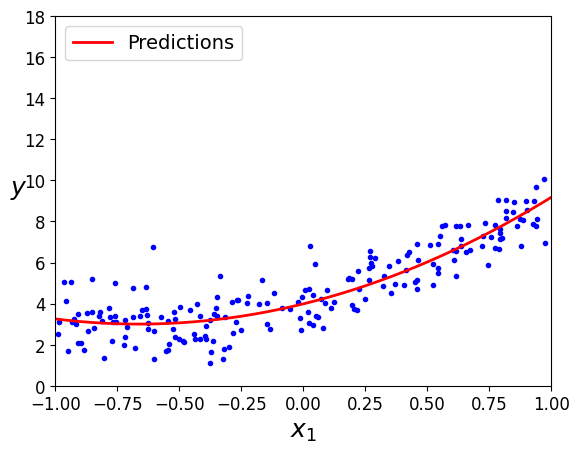

In [38]:
# 그래프 시각화
X_new=np.linspace(-1, 1, 200).reshape(200, 1) # np.linspace(시작, 끝, 개수) [시작,끝] 구간 내에 <<개수>> 만큼의 숫자 생성 
X_new_poly = poly_features.transform(X_new)
y_new = mod2.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-1, 1, 0, 18])
plt.show()

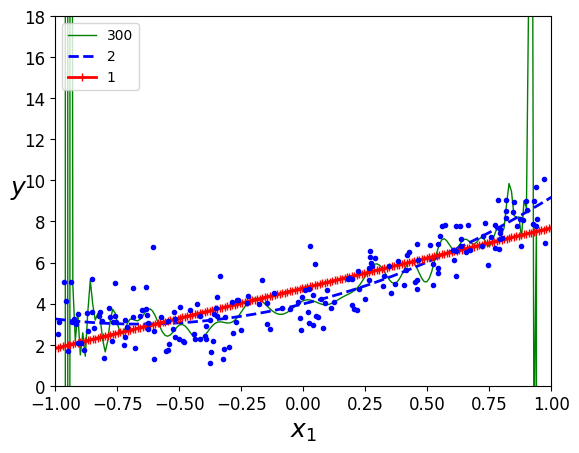

In [39]:
# 특성의 개수에 따른 결과
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-1, 1, 0, 18])
plt.show()

# 학습 곡선 

In [40]:
# 과대적합과 과소적합 판단하기

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 훈련 세트와 검증 세트를 8:2로 나누어 MSE 구하기

# learning curve 함수
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

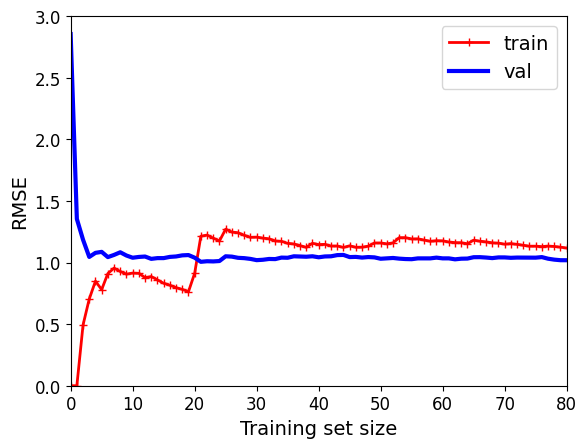

In [41]:
# 훈련 세트와 검증세트가 너무 빨리 가까워지면 과소적합을 의심할 수 있음
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()

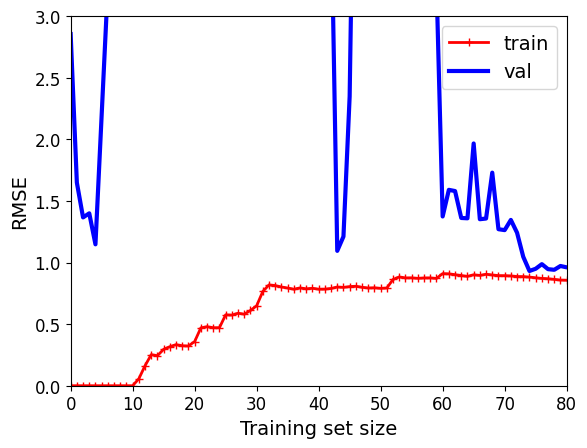

In [42]:
# 과소적합을 해결
# 고차항 만들어서 해결 => 에러가 더 낮아짐 => 더 바람직한 그래프임

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()